## Flight Fare Prediction

<table>
    <tr>
        <th>Project Title</th>
        <td>Flight Fare Prediction</td>
    </tr>
    <tr>
        <th>Technologies</th>
        <td>Machine Learning Technology</td>
    </tr>
    <tr>
        <th>Domain</th>
        <td>Aviation</td>
    </tr>
</table>

### Problem Statement
Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in the provided dataset.

### Approach
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing.

### Features
1. Airline
    * The airline providing the flight service.
2. Date_of_Journey
    * The date when the flight departs.
3. Source
    * The departure city or airport.
4. Destination
    * The arrival city or airport.
5. Route
    * Route taken by flight.
6. Dep_Time
    * The time when the flight departs.
7. Arrival_Time
    * The time of day when the flight arrives.
8. Duration
    * Total duration of the flight in minutes.
9. Total_Stops
     * Number of stops in flight.
10. Additional_Info
    * Other features that may impact flight fare, including the provision of in-flight meals.
11. Price
    * The cost of the flight ticket.

In [110]:
# importing libraries
import numpy as np
import pandas as pd
import warnings
import IPython.display

# Any warning created by pandas, python, other library will be ignored
warnings.filterwarnings("ignore")
# Setting Maximum number of displaying columns to None to see all columns
pd.set_option('display.max_columns', None)

In [111]:
# For this notebook I have stored a copy of data inside notebooks directory
train_dataset_path = './data/Data_Train.xlsx'
test_dataset_path = './data/Test_set.xlsx'
sub_dataset_path = './data/Sample_submission.xlsx'

# reading dataset
train = pd.read_excel(train_dataset_path)
test = pd.read_excel(test_dataset_path)
sub = pd.read_excel(sub_dataset_path)

In [112]:
def get_details(data: pd.DataFrame) -> None:
    '''
    Displays the details, information and statistics about data.
    * Details = Number of Rows, Columns.
    * Details = Datatypes information, Top 5 and Last 5 rows of data.
    * Statistics = NaN Values, Descriptive Statistics.
    ## Parameters
    `data`: Pandas DataFrame Object
    '''

    def title(string: str, width=50) -> None:
        '''
        Prints a centered string of length width(default=50).
        ### Example
        >>> title('abc')
        '----------------------abc-----------------------'
        >>>
        '''
        print(string.center(width, '_'))
    
    title('Shape')
    Rows = data.shape[0]
    Columns = data.shape[1]
    print(f'{Rows=}\n{Columns=}')

    title('Types')
    # Displays the dtypes object to cell output
    IPython.display.display(data.dtypes)

    title('Head')
    # displays the data.head to cell output
    IPython.display.display(data.head())

    title('Tail')
    IPython.display.display(data.tail())

    title('Nan Values')
    IPython.display.display(data.isna().sum())
    
    title('Statistics')
    # displays the descriptive statistics to cell output
    IPython.display.display(data.describe().T)

### Dataset Information

In [113]:
# details of train dataset
get_details(train)

----------------------Shape-----------------------
Rows=10683
Columns=11
----------------------Types-----------------------


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

-----------------------Head-----------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


-----------------------Tail-----------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


--------------------Nan Values--------------------


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

--------------------Statistics--------------------


,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [114]:
# details of test dataset
get_details(test)

----------------------Shape-----------------------
Rows=2671
Columns=10
----------------------Types-----------------------


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

-----------------------Head-----------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


-----------------------Tail-----------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


--------------------Nan Values--------------------


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

--------------------Statistics--------------------


,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


Here we can see that the test dataset is missing a **Price** column.

In [115]:
# details of sub dataset
get_details(sub)

----------------------Shape-----------------------
Rows=2671
Columns=1
----------------------Types-----------------------


Price    int64
dtype: object

-----------------------Head-----------------------


,Price
0,15998
1,16612
2,25572
3,25778
4,16934


-----------------------Tail-----------------------


,Price
2666,14046
2667,14086
2668,22720
2669,23544
2670,27489


--------------------Nan Values--------------------


Price    0
dtype: int64

--------------------Statistics--------------------


,count,mean,std,min,25%,50%,75%,max
Price,2671.0,20159.514414,5005.399225,10138.0,16469.5,19582.0,23476.5,64881.0


### Duplicate Rows

In [116]:
# Droping Duplicates
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [117]:
# Droping NaN Values there are only 2 NaN values
train.dropna(inplace=True)

In [118]:
# Adding both train and test dataset into one dataframe 
df = pd.concat(objs = [train, test], axis=0, ignore_index=True)

In [119]:
# details of the both train and test dataset
get_details(df)

----------------------Shape-----------------------
Rows=13107
Columns=11
----------------------Types-----------------------


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

-----------------------Head-----------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


-----------------------Tail-----------------------


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13102,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13103,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13104,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13105,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13106,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


--------------------Nan Values--------------------


Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2645
dtype: int64

--------------------Statistics--------------------


,count,mean,std,min,25%,50%,75%,max
Price,10462.0,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0


These 2645 Nan values are from the missing Price column in test dataset.

In [120]:
# Cleaning Data

# Duration is time taken by Flight to reach destination
# It is difference of Arrival Time and Departure Time
# The duration in dataset is written as '10h 50m' splitting it in two columns

# the regex pattern '(\d+)h would match any string that ends with 'h'
hours = df['Duration'].str.extract(pat=r'(\d+)h')
# filling the NaN values with 0 because flight is less than 1 hour
hours.fillna(value=0, inplace=True)

# the regex pattern here '(\d+)m' would match any string that ends with 'm'
minutes = df['Duration'].str.extract(pat=r'(\d+)m')
# filling the NaN values with 0 because flight take proper time in hours
minutes.fillna(value=0, inplace=True)

In [121]:
# converting the hours and minutes into integers as these as extracted from string
df['Duration_Hours'] = hours.astype(int)
df['Duration_Mins'] = minutes.astype(int)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45


In [122]:
# Extracting day of journey from Date
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
# Extracting Month of Journey from Date
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3


In [123]:
# Splitting the departure time into two columns using ":" as seperater
# For Departure Hour and Departure Minutes
departure_time = df['Dep_Time'].str.split(pat=':', expand=True)
# converting both columns into integers
df['Dep_Hour'] = departure_time[0].astype(int)
df['Dep_Min'] = departure_time[1].astype(int)

In [124]:
# Extracting Arrival Hour and Arrival Minutes from Arrival Time
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [125]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


In [126]:
# importing library for graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Arrival Hour

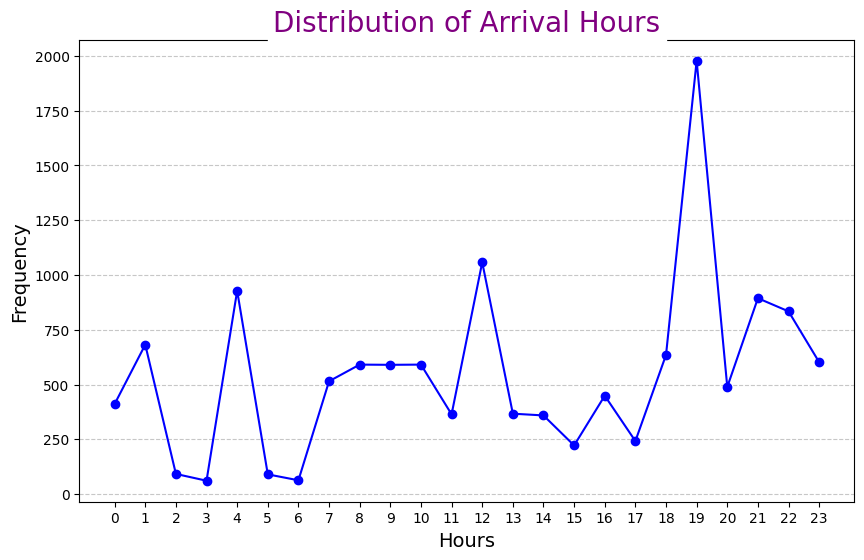

In [127]:
# setting the figure size 10x6
plt.figure(figsize=(10, 6))

# counting the frequency of each Arrival hour
arrival_hour = df['Arrival_Hour'].value_counts().sort_index()

# plotting a line graph of each Arrival Hour
arrival_hour.plot(kind='line', marker='o', color='blue', linestyle='-')

# setting the title of graph
plt.title("Distribution of Arrival Hours", fontsize=20, backgroundcolor='white', color='purple')

# setting the x-axis label of graph
plt.xlabel('Hours', fontsize=14)

# setting the y-axis label of graph
plt.ylabel('Frequency', fontsize=14)

# adding each hour x-axis
plt.xticks(ticks=range(24))

# adding grid lines to graph
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

**Conclusion:** 
1. Most of the flight arrives at 7 PM followed by at 12 PM and 4 AM.
2. Very less number of flight arrives in between 2AM to 3AM and 5AM to 6AM.

### Distribution of Departure Hour

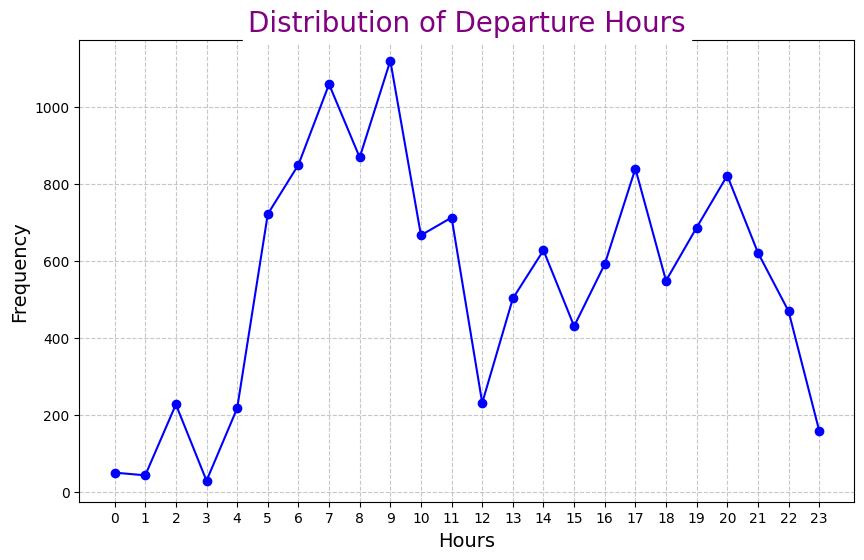

In [157]:
# setting the figure size 10x6
plt.figure(figsize=(10, 6))

# Counting the frequency of each Depature Hour
dep_time = df['Dep_Hour'].value_counts().sort_index()

# plotting a line graph
dep_time.plot(kind='line', marker='o', style='-', color='blue')

# settting the Title of graph
plt.title("Distribution of Departure Hours", fontsize=20, backgroundcolor='white', color='purple')


# setting the x-axis label of graph
plt.xlabel('Hours', fontsize=14)

# setting the y-axis label of graph
plt.ylabel('Frequency', fontsize=14)

# adding each hour on x-axis
plt.xticks(ticks=range(24))

# adding grid lines to graph
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

**Conclusion:**
1. Most flight deperature at 7AM and 9 AM followed by 5PM and 8PM.
2. Very less number of flight departure at in between 12AM and 1 AM.

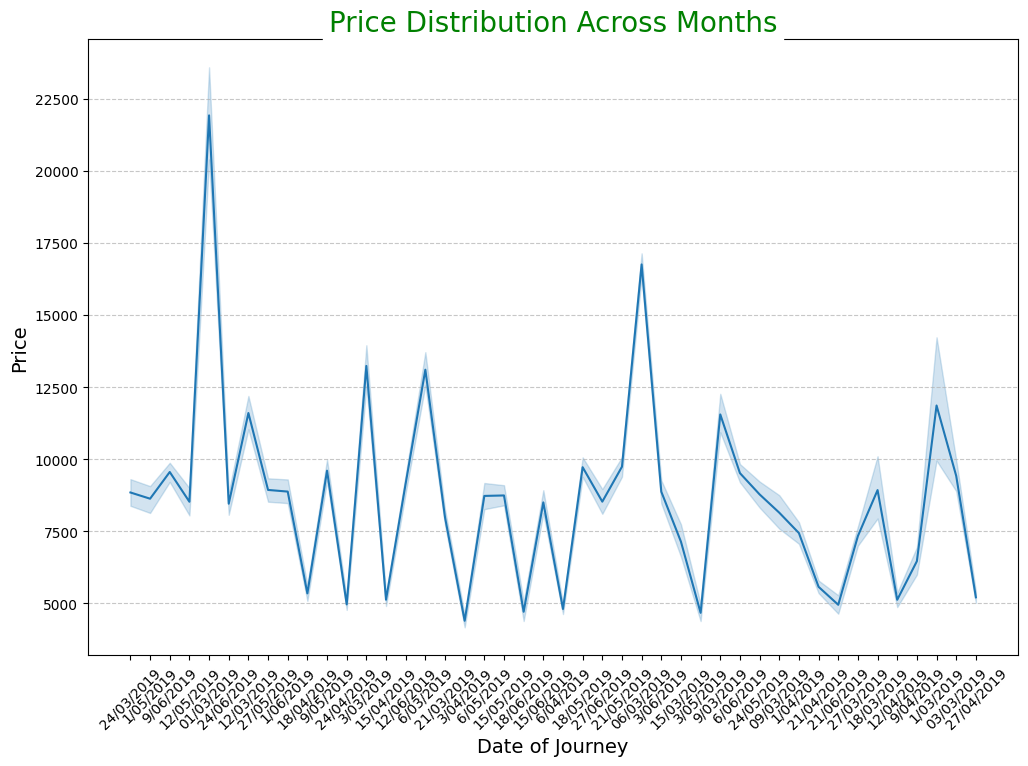

In [129]:
# filtering out null values from Price column
df_no_null = df[df['Price'].notna()]

plt.figure(figsize=(12, 8))

sns.lineplot(data=df_no_null, x='Date_of_Journey', y='Price', sort=True)

# Title of Graph
plt.title("Price Distribution Across Months", fontsize=20, backgroundcolor='white', color='green')
plt.xlabel('Date of Journey', fontsize=14)
plt.ylabel('Price', fontsize=14)

# adding grid to graph
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

In [130]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


### Highest Journey Month

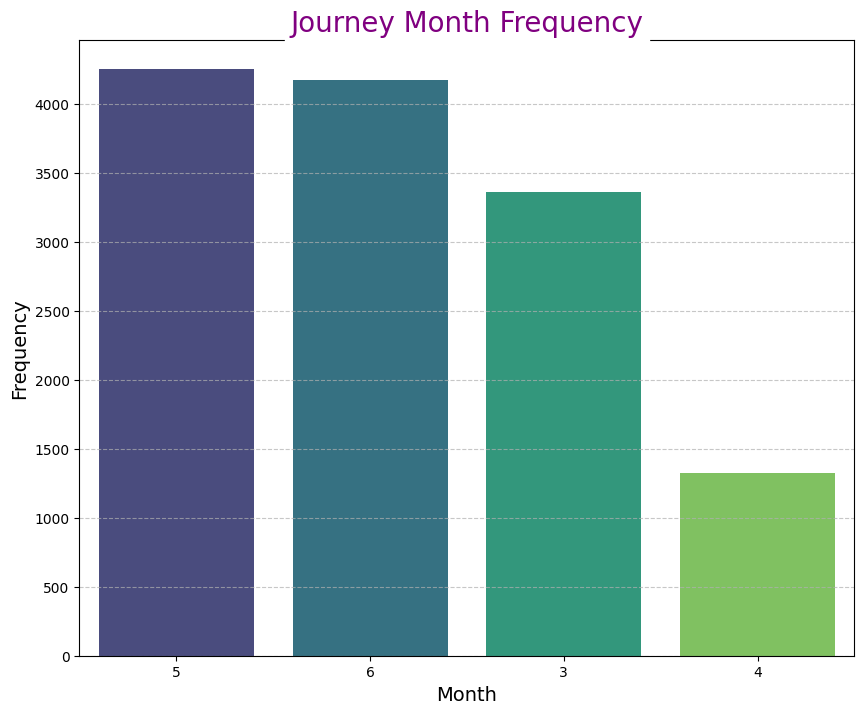

In [131]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Journey_Month', order=df['Journey_Month'].value_counts().index, palette='viridis')

# Title of Graph
plt.title('Journey Month Frequency', fontsize=20, backgroundcolor='white', color='purple')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Month', fontsize=14)

# adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribution of Hours

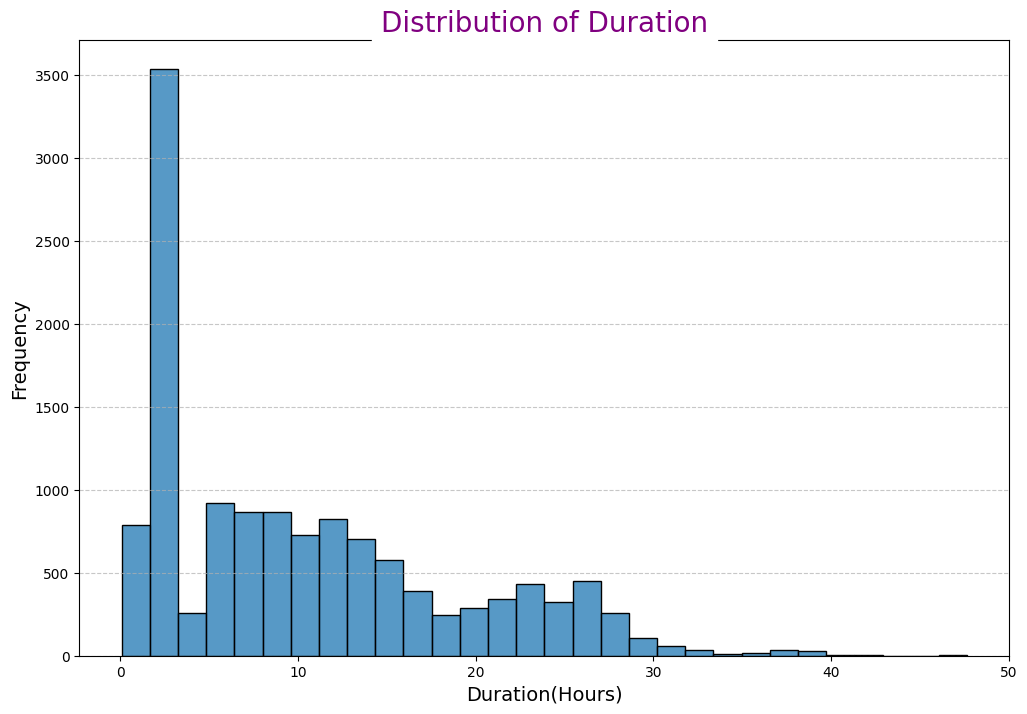

In [132]:
duration = df['Duration_Hours'] + (df['Duration_Mins']/60)
plt.figure(figsize=(12, 8))
sns.histplot(data=duration, palette='viridis', bins=30)

# Title of Distribution
plt.title('Distribution of Duration', backgroundcolor='white', color='purple', fontsize=20)
plt.xlabel('Duration(Hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Droping columns

In [133]:
# droping columns Arrival_Time, Date_of_Journey, Duration, Dep_Time
df.drop(columns=["Arrival_Time", "Date_of_Journey", "Duration", "Dep_Time"], inplace = True)

Selecting Categorical and Numerical Columns

In [134]:
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns

In [135]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4,45,1,3,16,50,21,35


In [136]:
# Creaing Price bins values into discreate interval
df['Price_Range'] = pd.cut(
    x=train['Price'], 
    bins=[0, 10000, 15000, 20000, np.inf], 
    labels=['0-10k', '10-15k', '15-20k', '20k+']
    )
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_Hours,Duration_Mins,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Minute,Price_Range
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2,50,24,3,22,20,1,10,0-10k
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7,25,1,5,5,50,13,15,0-10k
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19,0,9,6,9,25,4,25,10-15k
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5,25,12,5,18,5,23,30,0-10k
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4,45,1,3,16,50,21,35,10-15k


### Price Distribution Graph

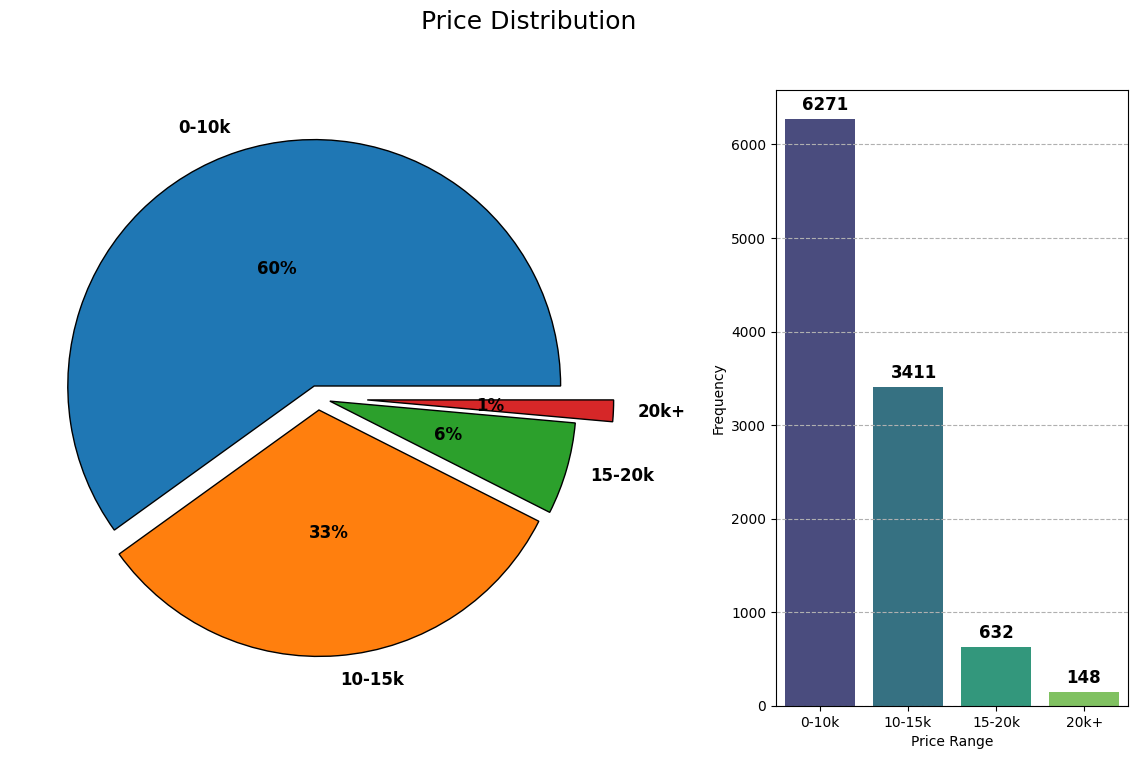

In [137]:
Price_Range = df['Price_Range'].value_counts()

# creating figure and axes for 2 plots
fig, ax = plt.subplots(1, 2, figsize=(15, 8), width_ratios=[2, 1])
# adding title of graph as Price Distribution
fig.suptitle(t='Price Distribution', fontsize=18)

# text property used to labels and texts on graphs
text_property = {
    'fontsize': 12, 
    'weight': 'bold',
    "color": "black"
    }
# creating pie plot
ax[0].pie(
    x=Price_Range.values,
    labels=Price_Range.index,
    autopct='%1.f%%',
    explode=([0.05]*(Price_Range.index.size - 1)) + [0.2],
    pctdistance=0.5,
    wedgeprops={'linewidth':1, 'edgecolor':'black'},
    textprops=text_property
    )
# Creating bar plot
sns.countplot(ax=ax[1], data=df, x='Price_Range', palette='viridis')

# Writing height of bar above the bar in second graph
for i, count in enumerate(Price_Range.values):
    ax[1].text(x=(i-0.2), y=count + 100, s=str(count), fontdict=text_property)

# X axis label of second graph
ax[1].set_xlabel('Price Range')
# Y axis label of second graph
ax[1].set_ylabel('Frequency')
# Adding grid lines to second graph
ax[1].grid(axis='y', linestyle='--')

plt.show()

### Price Distribution by Airlines

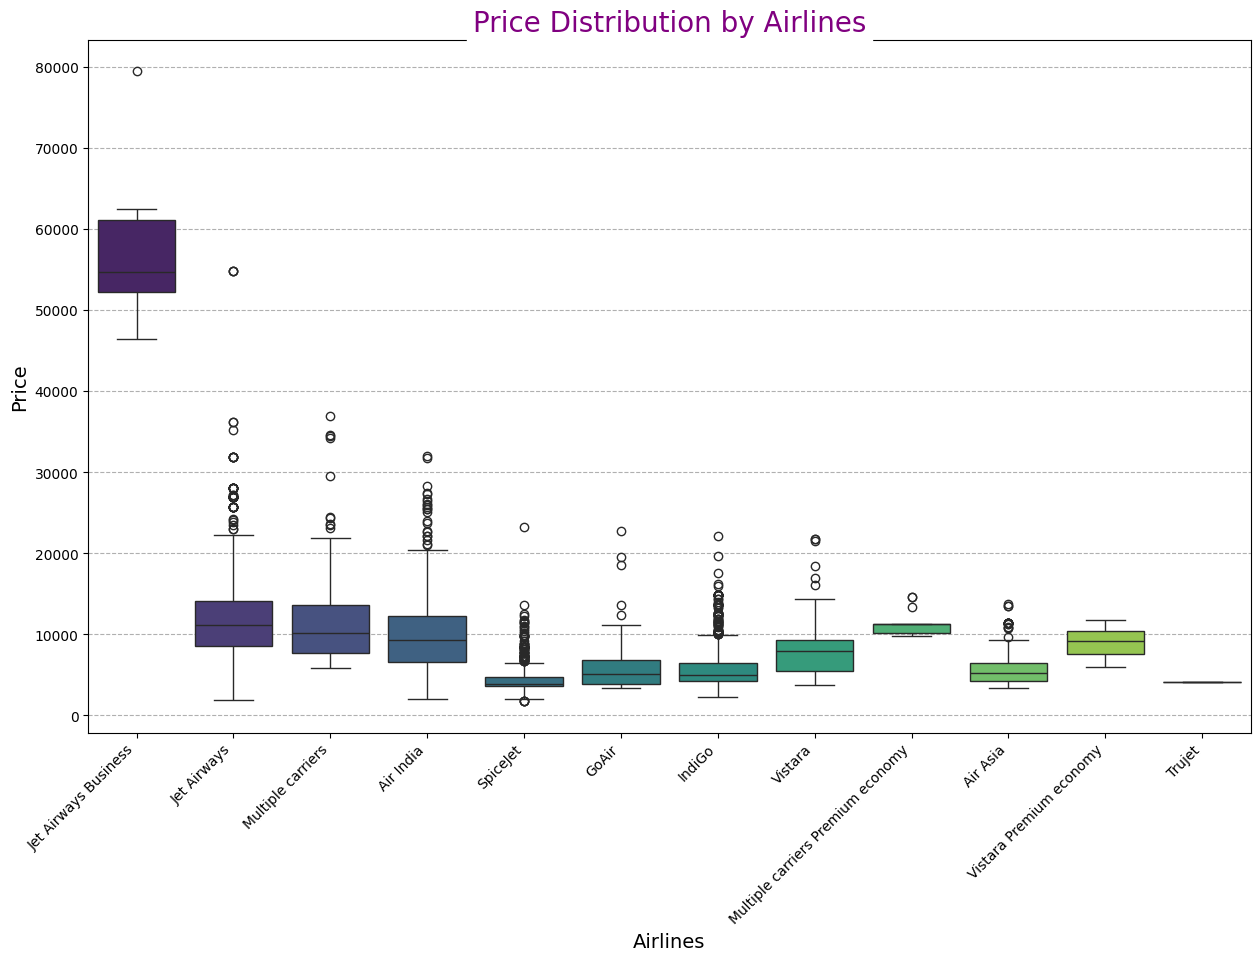

In [138]:
# setting figure size
plt.figure(figsize=(15, 9))
# boxplot
sns.boxplot(data=df.sort_values(by='Price', ascending=False), x='Airline', y='Price', palette='viridis')
# setting title of graph
plt.title('Price Distribution by Airlines', fontsize=20, color='purple', backgroundcolor='white')
# X axis label for graph
plt.xlabel('Airlines', fontsize=14)
# Y axis label for graph
plt.ylabel('Price', fontsize=14)
# Rotating the x-axis label at 45 degree and aligning label to right
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

Conclusion:
* Jet Airways Business Ticket Price are very high.
* SpiceJet, Indigo, Air Asia are more on afforable side.

In [152]:
categorical_columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

'______________________________Airline Value Count_______________________________'

,Frequency,Airline Ratio
Airline,,
Jet Airways,4586,34.99
IndiGo,2552,19.47
Air India,2126,16.22
Multiple carriers,1539,11.74
SpiceJet,1023,7.80
Vistara,607,4.63
Air Asia,405,3.09
GoAir,239,1.82
Multiple carriers Premium economy,16,0.12


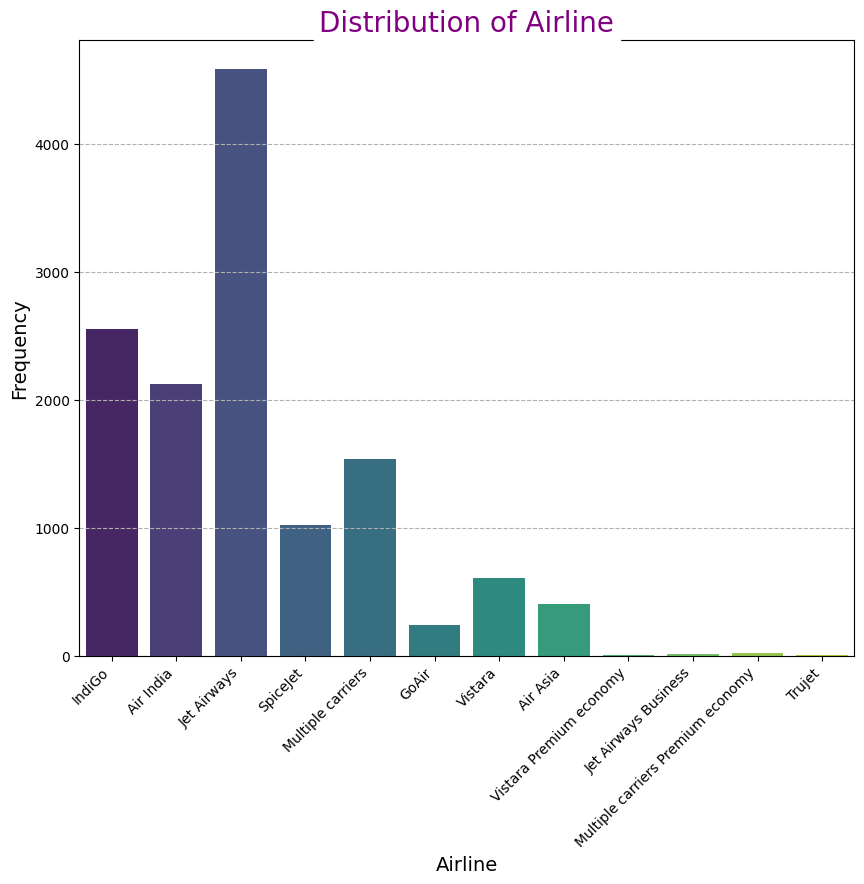

'_______________________________Source Value Count_______________________________'

,Frequency,Source Ratio
Source,,
Delhi,5472,41.75
Kolkata,3567,27.21
Banglore,2729,20.82
Mumbai,883,6.74
Chennai,456,3.48


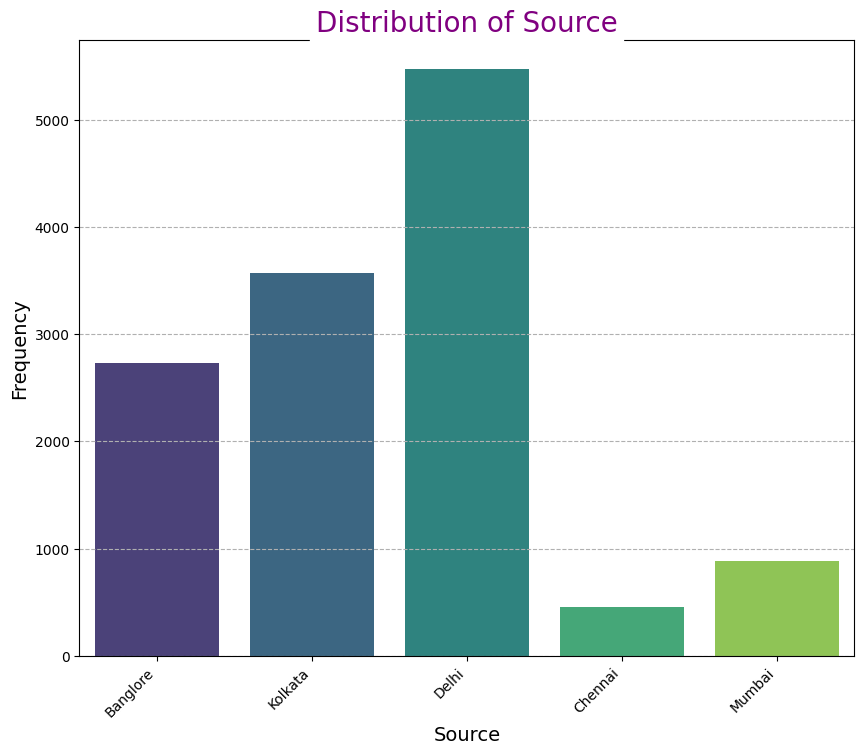

'____________________________Destination Value Count_____________________________'

,Frequency,Destination Ratio
Destination,,
Cochin,5472,41.75
Banglore,3567,27.21
Delhi,1582,12.07
New Delhi,1147,8.75
Hyderabad,883,6.74
Kolkata,456,3.48


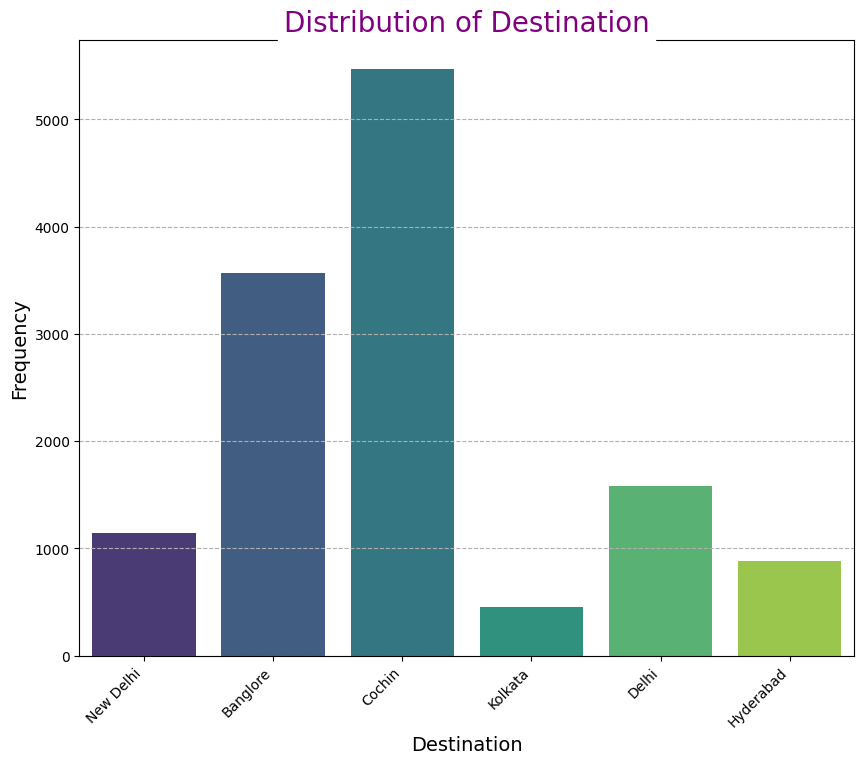

'____________________________Total_Stops Value Count_____________________________'

,Frequency,Total_Stops Ratio
Total_Stops,,
1 stop,7052,53.80
non-stop,4321,32.97
2 stops,1678,12.80
3 stops,54,0.41
4 stops,2,0.02


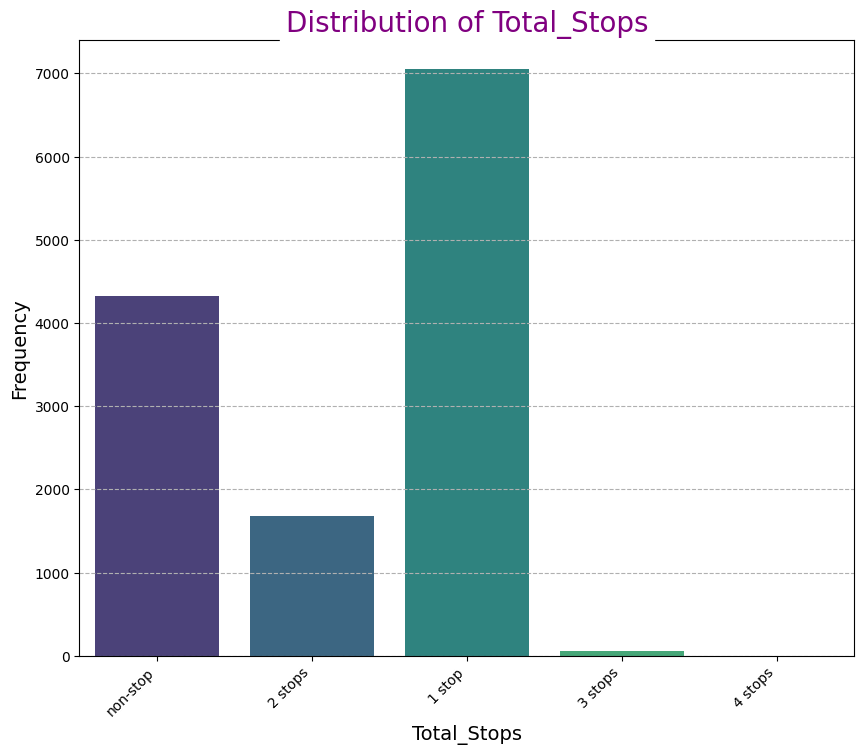

'__________________________Additional_Info Value Count___________________________'

,Frequency,Additional_Info Ratio
Additional_Info,,
No info,10308,78.64
In-flight meal not included,2366,18.05
No check-in baggage included,394,3.01
1 Long layover,20,0.15
Change airports,8,0.06
Business class,5,0.04
No Info,3,0.02
1 Short layover,1,0.01
Red-eye flight,1,0.01


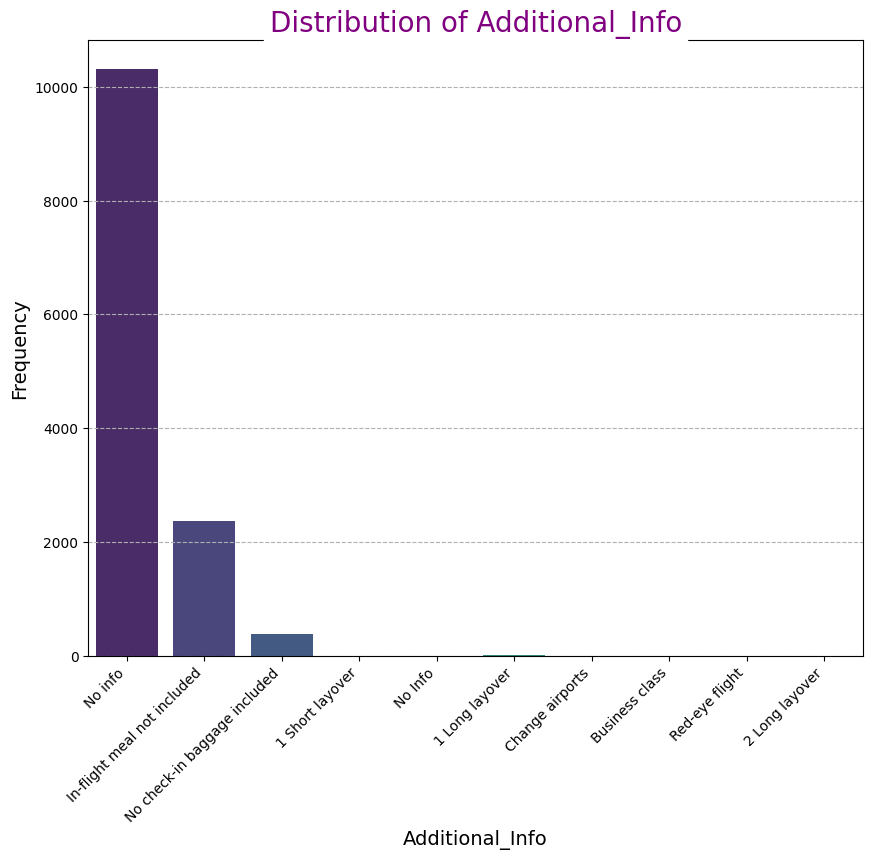

In [153]:
for column in categorical_columns:
    # Here I am removing skipping Route Column as there are too many categories
    if column == 'Route':
        continue
    
    # setting the figure size 10x8
    plt.figure(figsize=(10, 8))
    # Counting the frequency of all category inside column
    ColumnCount = df[column].value_counts()
    # diviing the frequency to the number of rows in dataframe
    ColumnRatio = (ColumnCount / df.index.size) * 100
    # storing frequency and ration inside temporary dataframe
    table = pd.DataFrame(
        data={
                'Frequency' : ColumnCount.values,
                f'{column} Ratio' : ColumnRatio.round(2)
            },
        index=ColumnCount.index
        )
    # Writing name of dataframe
    IPython.display.display(f'{column} Value Count'.center(80, '_'))
    # printing dataframe
    IPython.display.display(table)
    # Countplot of each column
    sns.countplot(data=df, x=column, palette='viridis')
    # setting the title of graph
    plt.title(f'Distribution of {column}', fontsize=20, color='purple', backgroundcolor='white')
    # setting x-axis label of graph
    plt.xlabel(column, fontsize=14)
    # setting the y axis label of graph
    plt.ylabel('Frequency', fontsize=14)
    # Rotating the x-axis label at 45 degree and aligning label to right
    plt.xticks(rotation=45, ha='right')
    # Adding grid lines to all graph
    plt.grid(axis='y', linestyle='--')

    plt.show()

In [ ]:
categori